In [24]:
import pandas as pd

# Load the dataset
data = pd.read_csv('project.csv')



In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [26]:
# Define thresholds for high, medium, and low CitationCounts
high_threshold = data['CitationCount'].quantile(0.7)
low_threshold = data['CitationCount'].quantile(0.3)

In [27]:
# Classify CitationCount into high, medium, and low categories
data['CitationCategory'] = pd.cut(data['CitationCount'], bins=[-float("inf"), low_threshold, high_threshold, float("inf")], labels=['Low', 'Medium', 'High'])

In [28]:
# Preprocessing
# Handling missing values (if any)
data.dropna(inplace=True)

In [29]:
# Encoding categorical variables
label_encoders = {}
for column in ['Title', 'Subject', 'Institution', 'Journal', 'Publisher', 'Country', 'Author', 'ArticleType', 'Reason', 'Paywalled', 'Notes', 'CitationCategory']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [30]:
X = data.drop(['CitationCount', 'CitationCategory', 'Record ID', 'URLS', 'RetractionDate', 'RetractionDOI', 'RetractionPubMedID', 'OriginalPaperDate', 'OriginalPaperDOI', 'OriginalPaperPubMedID', 'RetractionNature', 'Notes'], axis=1)
y = data['CitationCategory']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
X

,Title,Subject,Institution,Journal,Publisher,Country,Author,ArticleType,Reason,Paywalled
4,176,1491,2091,175,55,157,2979,32,182,0
5,117,2002,2647,175,55,63,3543,32,182,0
8,1439,269,5637,241,55,63,2707,32,182,0
10,1001,1798,3277,166,55,63,2950,32,182,0
11,5157,2239,2176,166,55,63,4969,9,182,0
...,...,...,...,...,...,...,...,...,...,...
35162,1556,1626,3854,81,9,209,17,32,540,0
35167,1212,1779,351,118,1,207,3835,32,38,0
35168,4145,1785,345,118,1,264,3684,32,38,0
35204,5184,1719,3582,647,7,175,3341,32,554,0


In [32]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [33]:
n_components = 5
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

columns=[]
for i in range(n_components):
  columns.append('PC'+str(i+1))

pca_df = pd.DataFrame(data=principal_components, columns=columns)

pca_df


,PC1,PC2,PC3,PC4,PC5
0,0.692885,-0.463335,0.503216,-1.548346,-0.251583
1,0.442462,-1.003096,0.061263,-1.545131,-0.304394
2,-0.602926,-1.717329,0.924301,-0.228447,0.781130
3,0.233631,-0.942096,0.326971,-1.007626,-0.087272
4,-0.730797,0.839985,-1.070391,0.178688,-1.400695
...,...,...,...,...,...
6851,0.915136,0.285825,2.975690,-0.504719,-1.050074
6852,0.288062,-0.041967,1.250223,-1.473967,-2.789583
6853,0.381717,0.677547,1.193597,-0.113118,-3.046786
6854,1.636161,-0.551164,1.464385,1.420564,-1.952411


In [34]:
print(pca.explained_variance_ratio_)

[0.26364976 0.12122524 0.10560777 0.09626108 0.09124522]


In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)


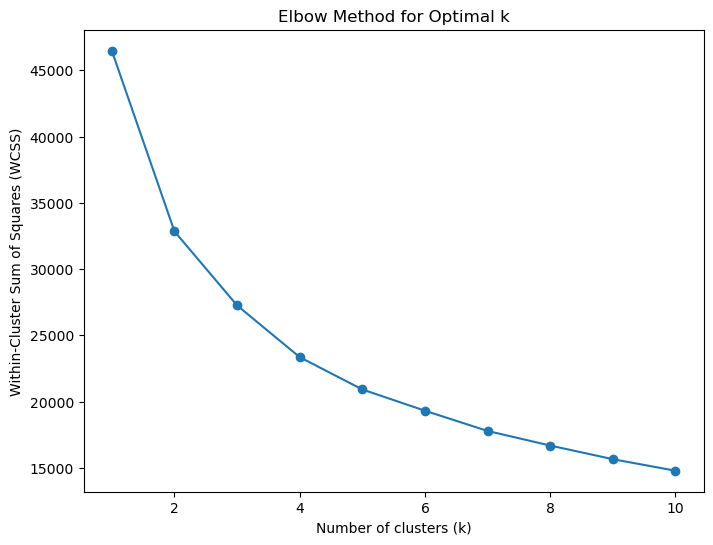

In [36]:

# Plot the Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [37]:
# Perform K-means clustering with the optimal k (assuming k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pca_df)

# Add the cluster labels to the DataFrame
pca_df['Cluster'] = kmeans.labels_




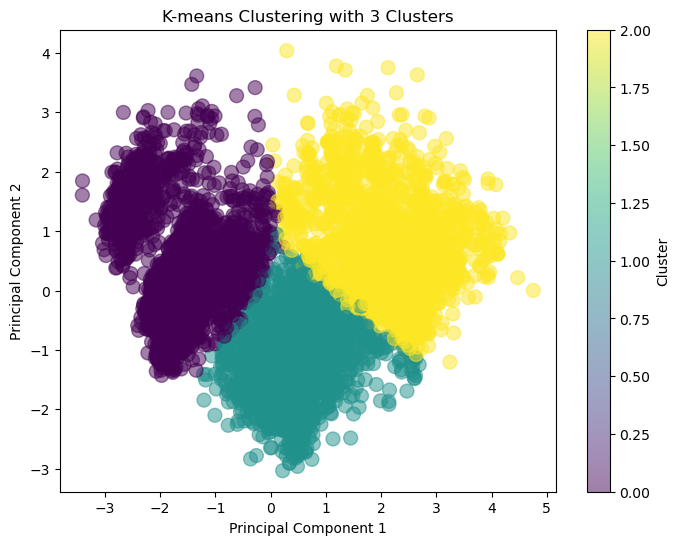

In [38]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=100, alpha=0.5)
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

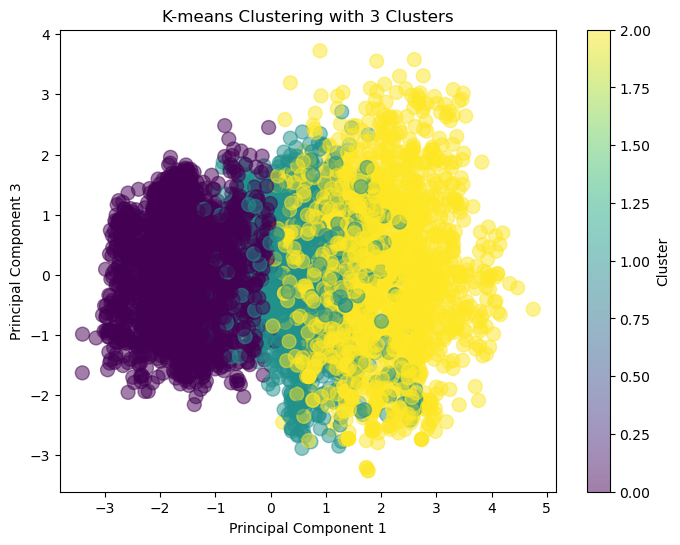

In [39]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis', s=100, alpha=0.5)
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.colorbar(label='Cluster')
plt.show()

In [40]:
columns

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

In [41]:
# Get the cluster centroids
centroids = kmeans.cluster_centers_
centroids

array([[-1.62000525,  0.32831111,  0.00453123, -0.07885561, -0.04627229],
       [ 0.51168425, -1.02458079, -0.03956354,  0.06573634,  0.04370427],
       [ 2.05557962,  0.8549795 ,  0.04690398,  0.04367987,  0.01854722]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=42)

Number of outliers: 343
Number of inliers: 6513


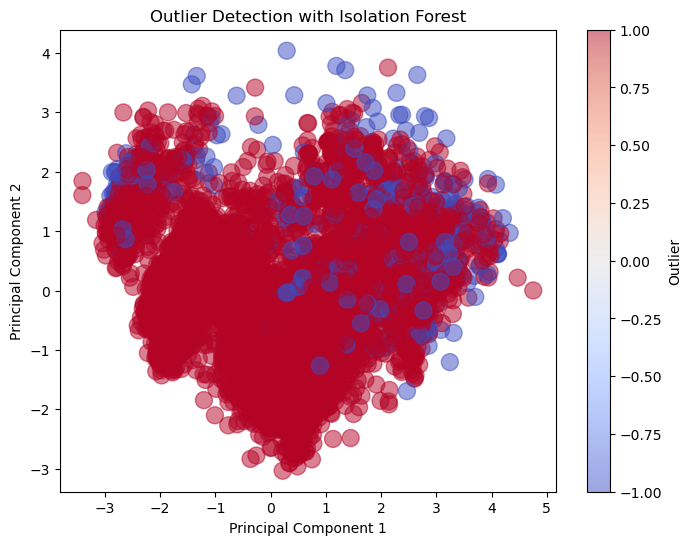

In [43]:
from sklearn.ensemble import IsolationForest


# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% of the data is assumed to be outliers

# Fit the model
iso_forest.fit(pca_df)

# Predict the outliers
outlier_pred = iso_forest.predict(pca_df)

# -1 for outliers, 1 for inliers
pca_df['Outlier'] = outlier_pred

# Count the number of outliers and inliers
outlier_count = np.sum(outlier_pred == -1)
inlier_count = np.sum(outlier_pred == 1)

print(f"Number of outliers: {outlier_count}")
print(f"Number of inliers: {inlier_count}")

# Visualize the outliers in the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Outlier'], cmap='coolwarm', s=150, alpha=0.5)
plt.title('Outlier Detection with Isolation Forest')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Outlier')
plt.show()


In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest

    'max_features': [ 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_classifier = grid_search.best_estimator_

# Print the best parameters found by grid search
print("Best Parameters:")
print(grid_search.best_params_)
print()

# Print the best cross-validation score
print("Best Cross-validation Score:", grid_search.best_score_)
print()

# Use the best classifier to make predictions on the test data
y_pred = best_rf_classifier.predict(X_test)

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters:
{'max_features': 'sqrt', 'n_estimators': 150}

Best Cross-validation Score: 0.7310362035811004

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       257
           1       0.80      0.83      0.82       719
           2       0.53      0.44      0.48       396

    accuracy                           0.71      1372
   macro avg       0.67      0.69      0.67      1372
weighted avg       0.70      0.71      0.70      1372



Classifier: Naive Bayes
 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.15      0.26       257
           1       0.62      0.97      0.76       719
           2       0.37      0.19      0.25       396

    accuracy                           0.59      1372
   macro avg       0.61      0.44      0.42      1372
weighted avg       0.59      0.59      0.52      1372



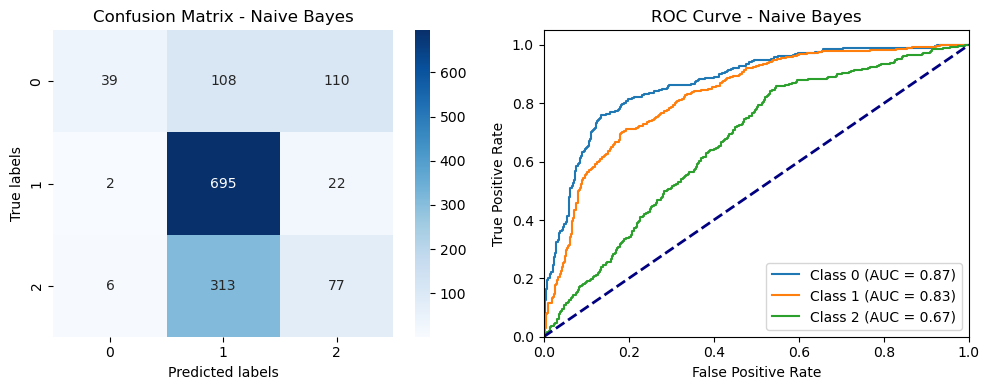

Classifier: KNN
 Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       257
           1       0.78      0.82      0.80       719
           2       0.49      0.42      0.45       396

    accuracy                           0.68      1372
   macro avg       0.64      0.65      0.64      1372
weighted avg       0.67      0.68      0.68      1372



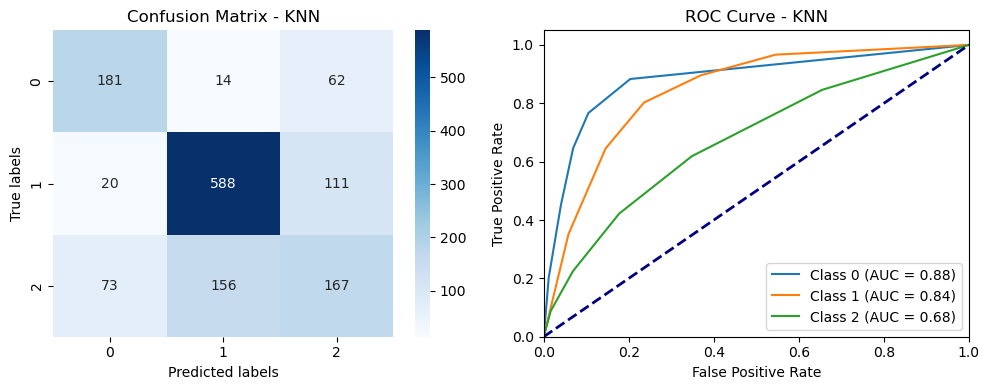

Classifier: SVM
 Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       257
           1       0.83      0.77      0.80       719
           2       0.51      0.53      0.52       396

    accuracy                           0.70      1372
   macro avg       0.66      0.68      0.67      1372
weighted avg       0.70      0.70      0.70      1372



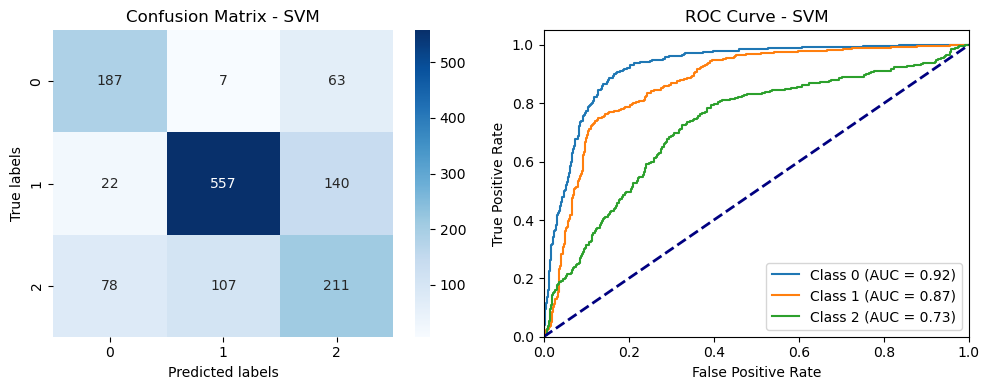

Classifier: Decision Tree
 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       257
           1       0.77      0.74      0.75       719
           2       0.45      0.51      0.48       396

    accuracy                           0.66      1372
   macro avg       0.64      0.64      0.64      1372
weighted avg       0.67      0.66      0.66      1372



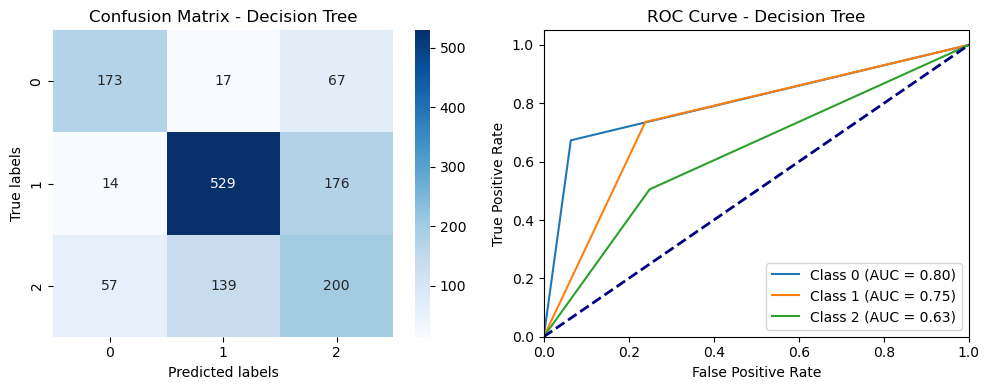

Classifier: Gradient Boosting
 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       257
           1       0.80      0.83      0.81       719
           2       0.53      0.47      0.50       396

    accuracy                           0.71      1372
   macro avg       0.68      0.69      0.68      1372
weighted avg       0.71      0.71      0.71      1372



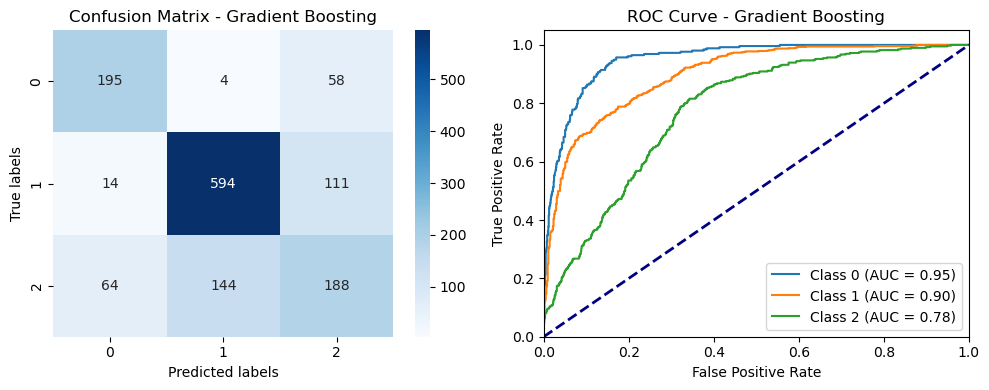

Classifier: AdaBoost
 Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       257
           1       0.80      0.81      0.81       719
           2       0.52      0.47      0.49       396

    accuracy                           0.70      1372
   macro avg       0.67      0.68      0.67      1372
weighted avg       0.70      0.70      0.70      1372



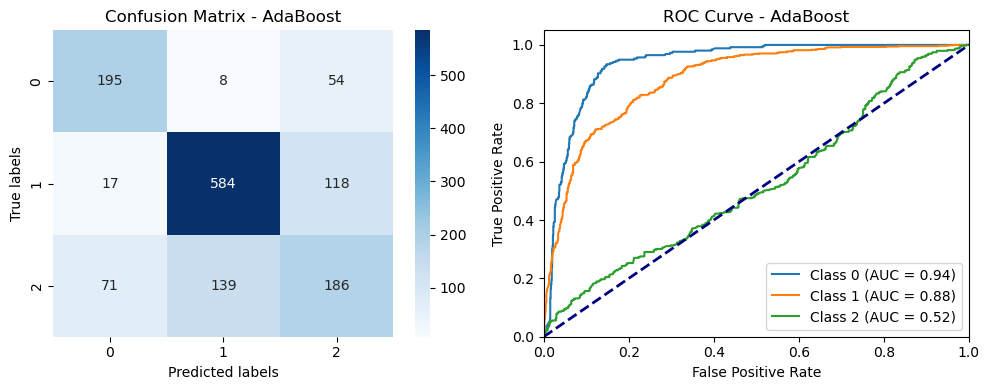

Classifier: Random Forest
 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.72       257
           1       0.80      0.84      0.82       719
           2       0.54      0.44      0.48       396

    accuracy                           0.71      1372
   macro avg       0.67      0.69      0.68      1372
weighted avg       0.70      0.71      0.71      1372



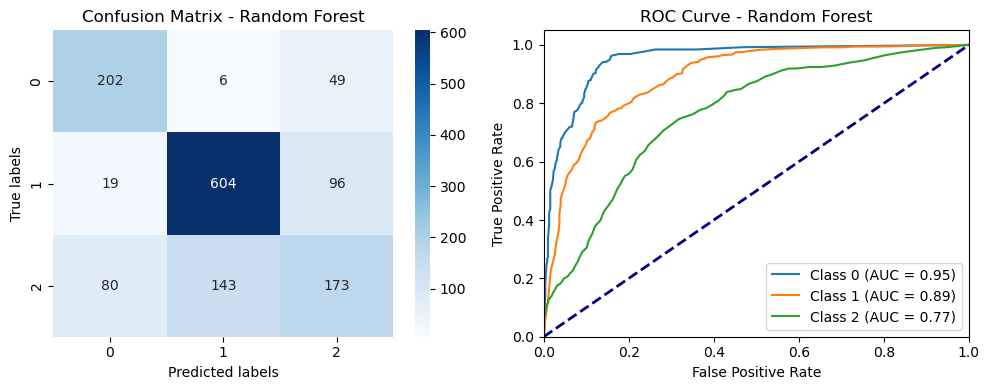

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

scaler = MinMaxScaler()
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)



# Define classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier() ,
     'AdaBoost':  AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42),
    'Random Forest': RandomForestClassifier(max_features='sqrt', n_estimators=100, random_state=42)
}

# Iterate over classifiers
for classifier_name, classifier in classifiers.items():
    print(f"Classifier: {classifier_name}")

    # Scale features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train classifier
    classifier.fit(X_train_scaled, y_train)

    # Predict labels
    y_pred = classifier.predict(X_test_scaled)

    # Generate and print classification report
    print(" Classification Report:")
    print(classification_report(y_test, y_pred))
    print("=" * 50)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classifier.classes_,
                yticklabels=classifier.classes_)
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

    # Compute probabilities
    y_prob = classifier.predict_proba(X_test_scaled)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classifier.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=classifier.classes_[i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.subplot(1, 2, 2)
    for i in range(len(classifier.classes_)):
        plt.plot(fpr[i], tpr[i], label=f'Class {classifier.classes_[i]} (AUC = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {classifier_name}')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()


Classifier: SVM
Fold 1 - Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.79      0.71       126
           1       0.80      0.75      0.77       355
           2       0.51      0.48      0.50       205

    accuracy                           0.68       686
   macro avg       0.65      0.68      0.66       686
weighted avg       0.68      0.68      0.68       686



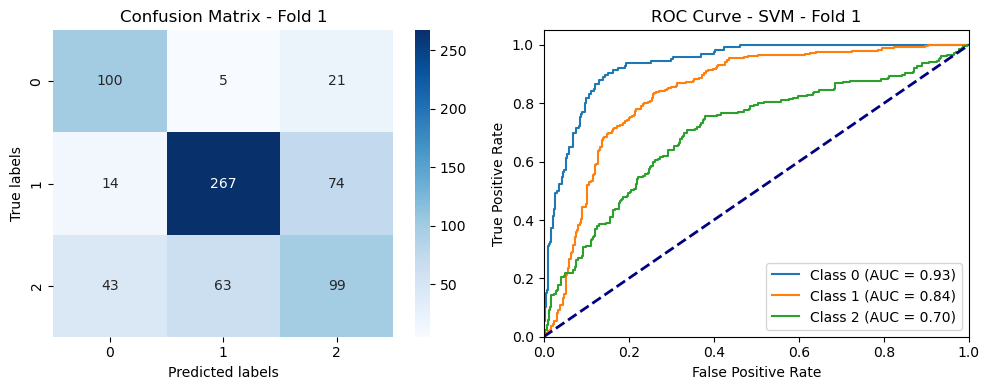

Fold 2 - Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.74      0.66       126
           1       0.83      0.75      0.79       355
           2       0.51      0.53      0.52       205

    accuracy                           0.68       686
   macro avg       0.65      0.67      0.66       686
weighted avg       0.69      0.68      0.69       686



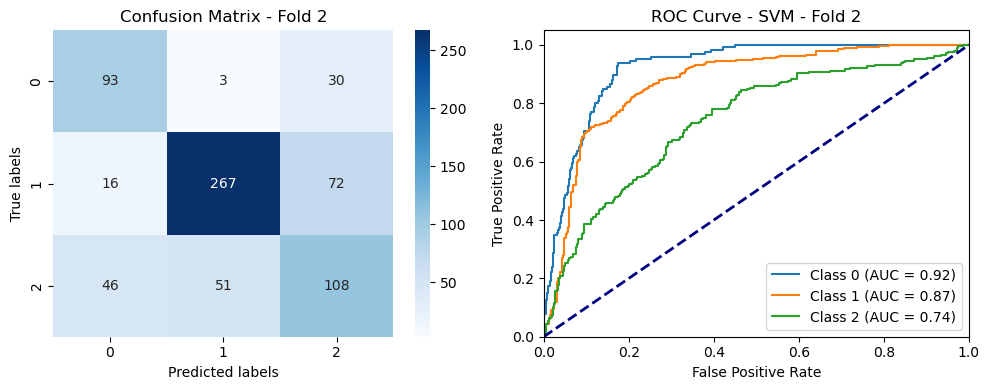

Fold 3 - Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       126
           1       0.81      0.75      0.78       355
           2       0.54      0.56      0.55       205

    accuracy                           0.70       686
   macro avg       0.68      0.71      0.69       686
weighted avg       0.71      0.70      0.71       686



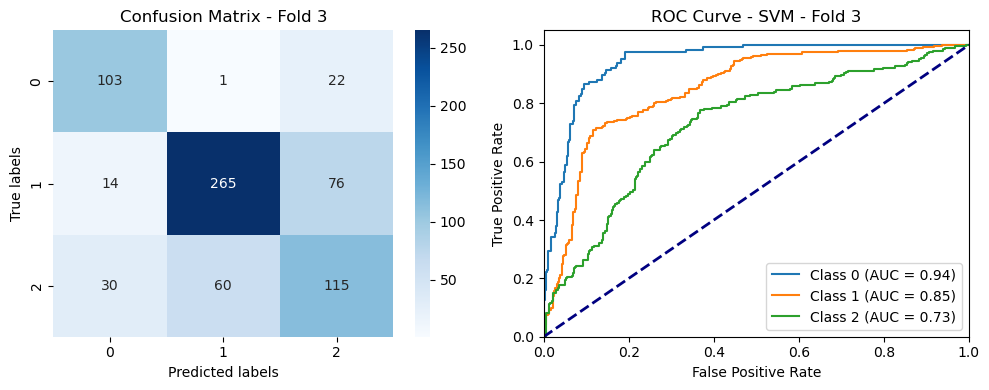

Fold 4 - Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       126
           1       0.80      0.76      0.78       355
           2       0.51      0.50      0.51       205

    accuracy                           0.68       686
   macro avg       0.65      0.67      0.66       686
weighted avg       0.69      0.68      0.68       686



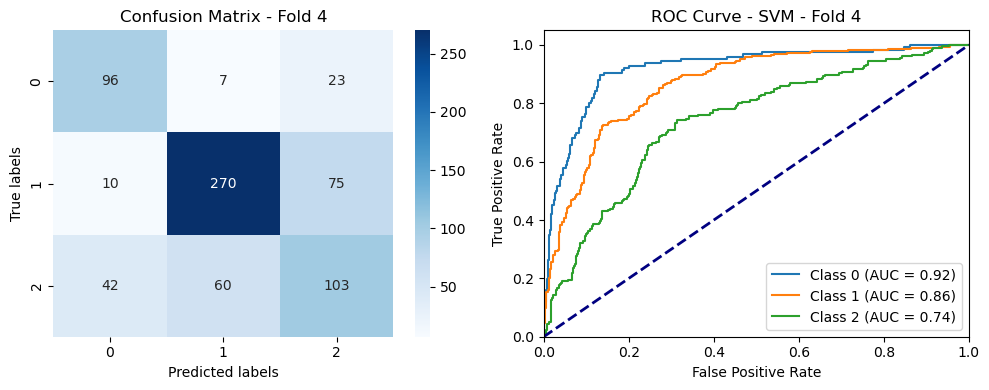

Fold 5 - Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       126
           1       0.81      0.81      0.81       356
           2       0.53      0.49      0.51       204

    accuracy                           0.71       686
   macro avg       0.67      0.69      0.68       686
weighted avg       0.70      0.71      0.70       686



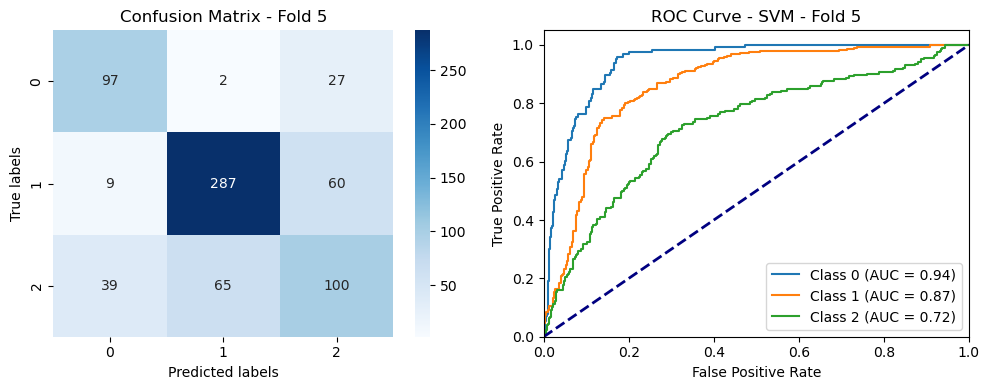

Fold 6 - Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.76      0.70       126
           1       0.82      0.80      0.81       356
           2       0.54      0.50      0.52       204

    accuracy                           0.70       686
   macro avg       0.67      0.69      0.68       686
weighted avg       0.70      0.70      0.70       686



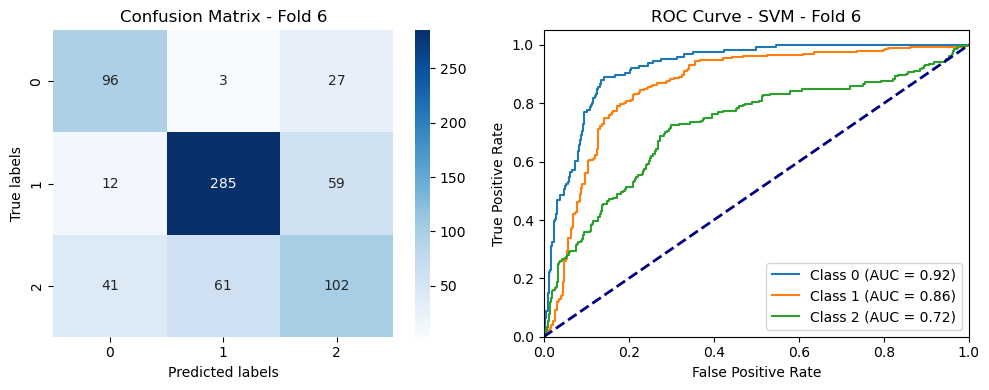

Fold 7 - Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.86      0.76       125
           1       0.84      0.77      0.80       356
           2       0.57      0.55      0.56       204

    accuracy                           0.72       685
   macro avg       0.69      0.73      0.71       685
weighted avg       0.73      0.72      0.72       685



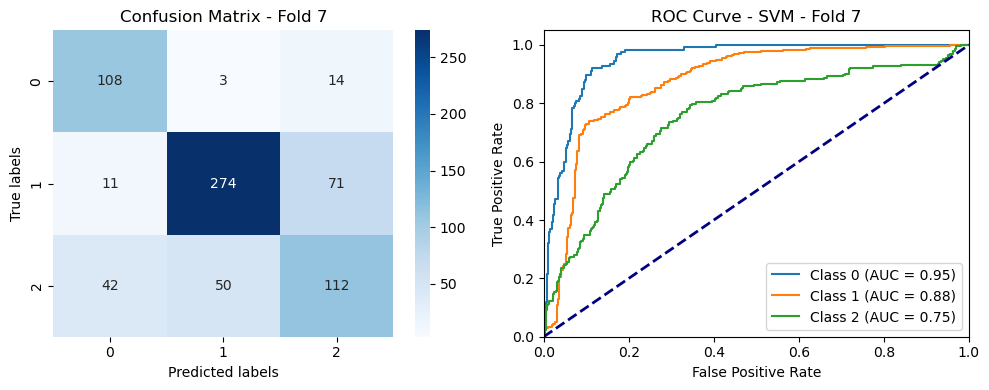

Fold 8 - Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.74      0.67       125
           1       0.82      0.83      0.82       356
           2       0.55      0.46      0.50       204

    accuracy                           0.71       685
   macro avg       0.66      0.68      0.67       685
weighted avg       0.70      0.71      0.70       685



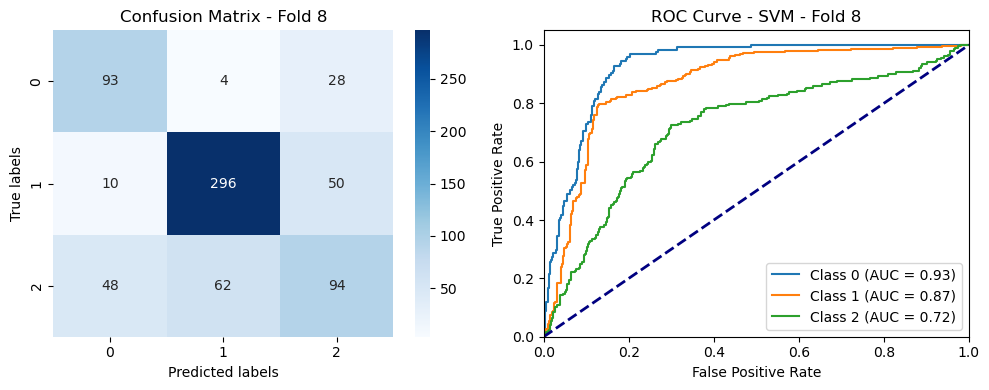

Fold 9 - Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       125
           1       0.83      0.81      0.82       356
           2       0.56      0.52      0.54       204

    accuracy                           0.72       685
   macro avg       0.68      0.70      0.69       685
weighted avg       0.72      0.72      0.72       685



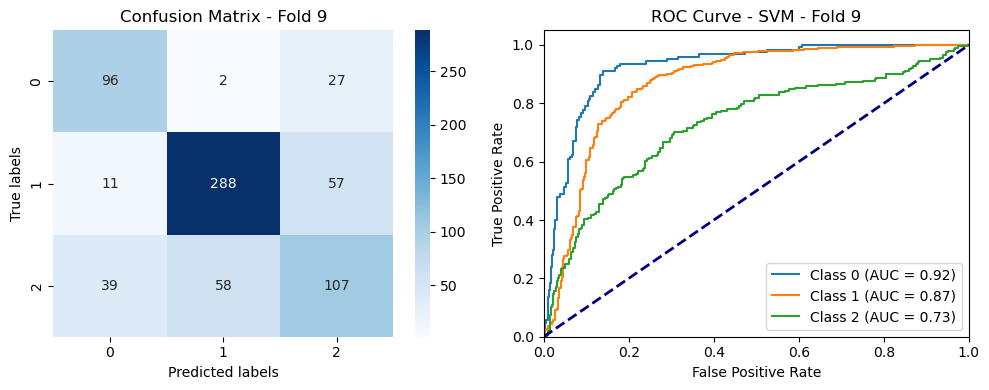

Fold 10 - Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       126
           1       0.82      0.80      0.81       355
           2       0.55      0.51      0.53       204

    accuracy                           0.71       685
   macro avg       0.68      0.69      0.68       685
weighted avg       0.71      0.71      0.71       685



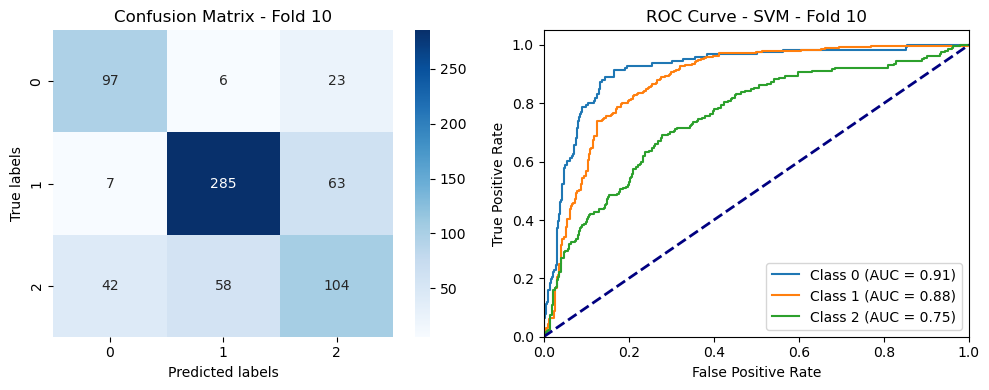

In [46]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Define classifiers
classifiers = {

    'SVM': SVC(probability=True),

}



# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)




# Iterate over classifiers
for classifier_name, classifier in classifiers.items():
    print(f"Classifier: {classifier_name}")
    fold = 1
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Scale features (if needed)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
        # Train classifier
        classifier.fit(X_train, y_train)

        # Predict labels
        y_pred = classifier.predict(X_test)

        # Generate and print classification report
        print(f"Fold {fold} - Classification Report:")
        print(classification_report(y_test, y_pred))
        print("="*50)

        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=classifier.classes_,
                    yticklabels=classifier.classes_)
        plt.title(f'Confusion Matrix - Fold {fold}')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')

        # Compute probabilities
        y_prob = classifier.predict_proba(X_test)

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(classifier.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=classifier.classes_[i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class
        plt.subplot(1, 2, 2)
        for i in range(len(classifier.classes_)):
            plt.plot(fpr[i], tpr[i], label=f'Class {classifier.classes_[i]} (AUC = {roc_auc[i]:0.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {classifier_name} - Fold {fold}')
        plt.legend(loc="lower right")

        plt.tight_layout()
        plt.show()

        fold += 1
